# Part II - Ford GoBike System Data Exploration
## by Seyma Alan




## Investigation Overview

Our main variable of interest is the trip duration. In this documentation, I tried to analyze which factors affect trip duration. The main focus was on the four variables: start station id, end station id, age and gender.



## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. There are more than 180000 data exists in the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the cleaned dataset into a pandas dataframe
trips = pd.read_csv('enhanced_fordgobike.csv')

## Distribution of Trip Durations

Trip durations in the dataset take on a very large range of values. Plotted on a logarithmic scale, trip durations are accumulated on the lower side of the plot. Most of the values are less than 2000 seconds. There is a peak around 600 seconds. Duration values first increases starting from around 8000 values at 0 to 12500 values at around 600 but then starts to fall. It goes below 2000 values at 2000 sec.


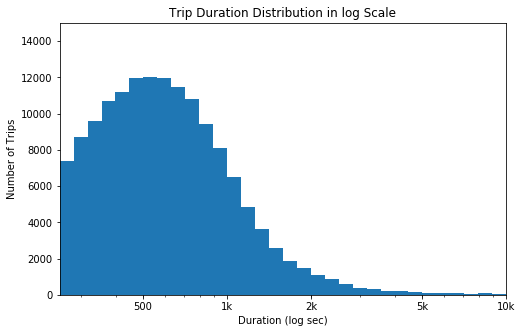

In [8]:
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(trips['duration_sec'].max()) + log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = trips, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.title('Trip Duration Distribution in log Scale')
plt.xlabel('Duration (log sec)')
plt.ylabel('Number of Trips')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

## Duration vs Age

There is a strong relation between trip durations and ages. Most of the users are in the range of 20-40 years old.

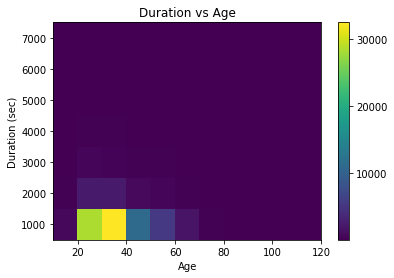

In [9]:
# Plotting age and duration relation density
bins_y = np.arange(500, 8001, 1000)
bins_x = np.arange(10, 121, 10)
plt.hist2d((2019 - trips['member_birth_year']), trips['duration_sec'], bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000,50000]);
plt.title('Duration vs Age')
plt.xlabel('Age')
plt.ylabel('Duration (sec)')
plt.show()

## Start Station Id vs End Station Id vs Total Duration

There is a relation between specific stations and trip duration. It seems like stations tend to have similar trip durations as start and end stations. This suggests us stations may have some popularity. In other words, stations at popular destinations might be used more than others.


In [10]:
# Creating a new dataframe to get the summation of duration values for each starting station id
comb_mean = trips.groupby(by=['start_station_id']).sum().reset_index()
comb_mean.start_station_id = comb_mean.start_station_id.astype(float)
comb_mean.sort_values(by=['start_station_id'], inplace = True)

# Creating a new dataframe to get the summation of duration values for each ending station id
comb_mean2 = trips.groupby(by=['end_station_id']).sum().reset_index()
comb_mean2.end_station_id = comb_mean2.end_station_id.astype(float)
comb_mean2.sort_values(by=['end_station_id'], inplace = True)

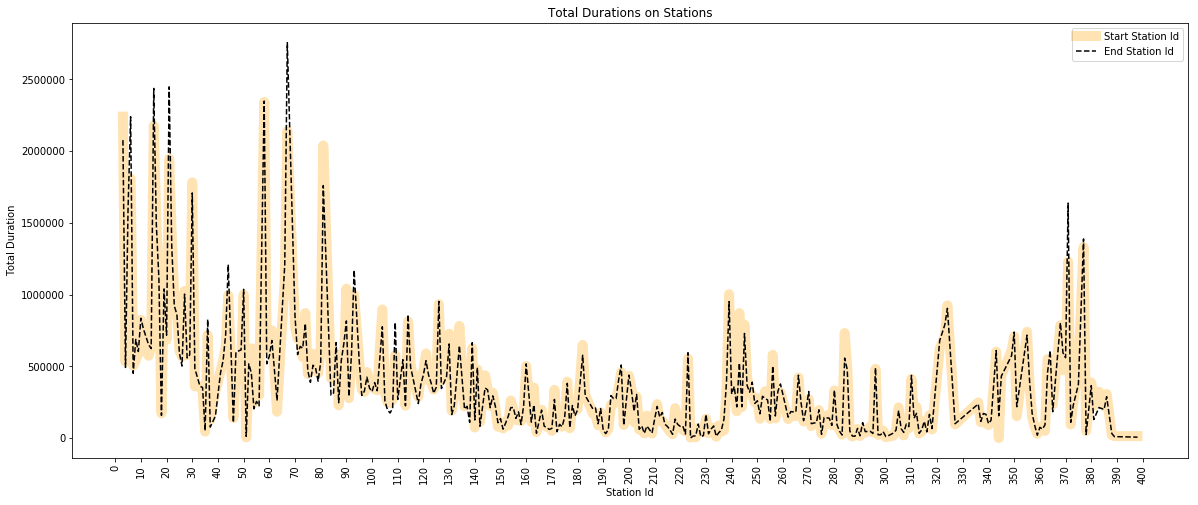

In [16]:
# Plotting start station id, end station id vs total duration relation with line plot
plt.figure(figsize = [20, 8])
plt.errorbar(x=comb_mean['start_station_id'], y=comb_mean['duration_sec'], label ='Start Station Id', linewidth=10, alpha = 0.3, color="orange")
plt.errorbar(x=comb_mean2['end_station_id'], y=comb_mean2['duration_sec'], label ='End Station Id', linestyle = '--', color="black")
plt.xticks(range(0, 410, 10), rotation = 90)
plt.title('Total Durations on Stations')
plt.xlabel('Station Id')
plt.ylabel('Total Duration')
plt.legend(loc ='upper right')
plt.show()

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 494315 bytes to Part_II_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_notebook.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
